In [76]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)



#Read in the data

df = pd.read_csv(r'C:\Users\readi\Downloads\Movies\movies.csv')

In [102]:
#let's look at the data

df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

In [78]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [79]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [80]:
#change data type of columns 

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int) 

df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce').fillna(0).astype(int) 

In [82]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int32
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime       int32
dtype: object

In [103]:
#Create correct Year column 

df['format_released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

In [84]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)

In [85]:
pd.set_option('display.max_rows', None)

In [86]:
# Drop any duplicates 

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [104]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

In [88]:
# Budget high correlation 
# Company will have a high correlation 

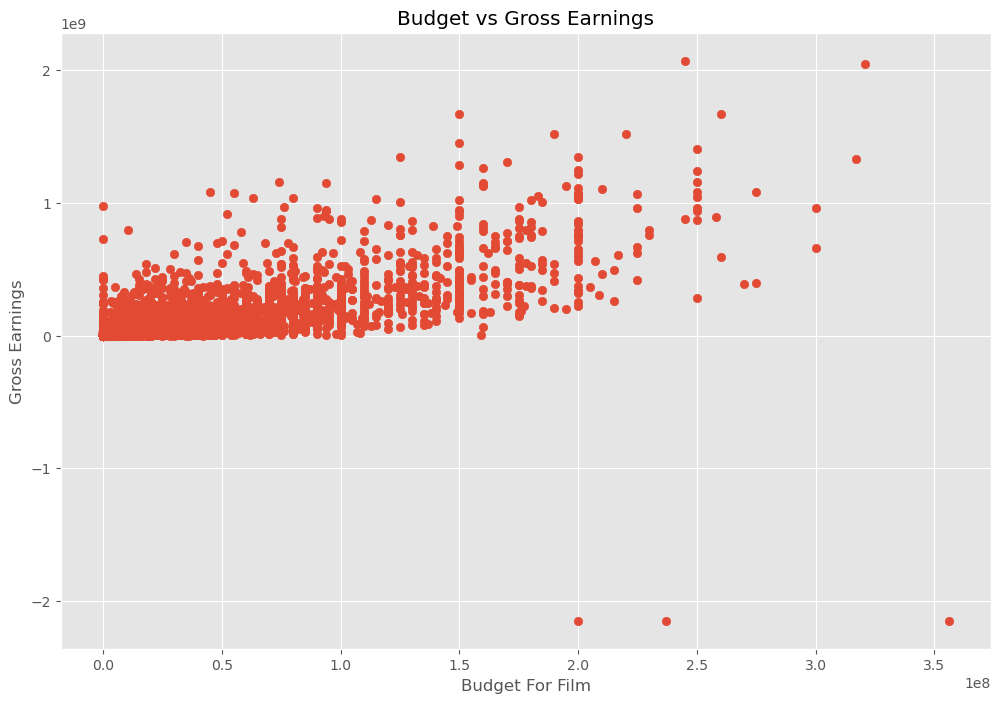

In [89]:
# Scatter plot with budget vs gross 

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')




plt.show()

In [90]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

<Axes: xlabel='budget', ylabel='gross'>

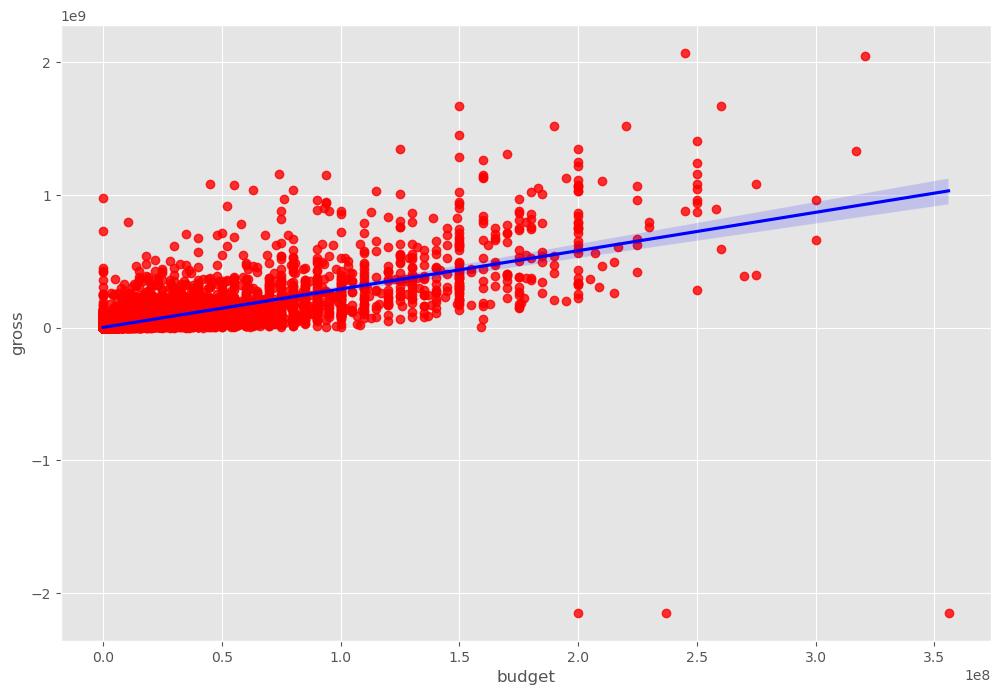

In [67]:
#plot the budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

In [ ]:
# Let's start looking at correlations

In [91]:
df.corr(method = 'pearson', numeric_only=True) #pearson, kendall, spearman

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222427  0.309212  0.256331  0.116358
score    0.097995  1.000000  0.409182  0.055665  0.169406  0.398387
votes    0.222427  0.409182  1.000000  0.486931  0.573930  0.306984
budget   0.309212  0.055665  0.486931  1.000000  0.687124  0.268372
gross    0.256331  0.169406  0.573930  0.687124  1.000000  0.203616
runtime  0.116358  0.398387  0.306984  0.268372  0.203616  1.000000

In [ ]:
# high correlation between budget and gross

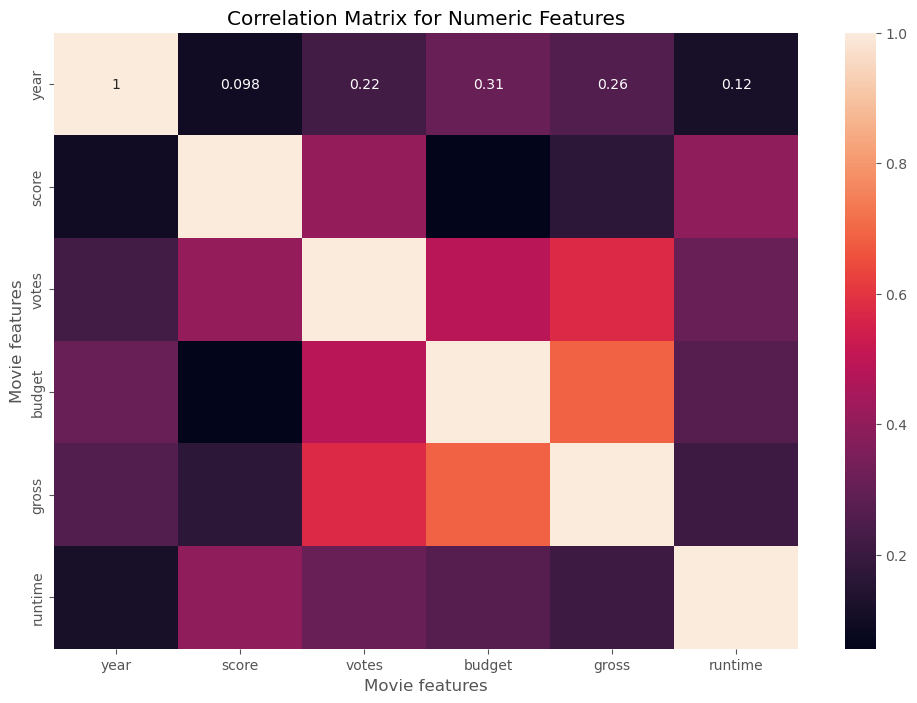

<Figure size 1300x1300 with 0 Axes>

In [92]:
correlation_matrix = df.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)


plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.figure(figsize=(13, 13))

plt.show()

In [93]:
#Looks at company

df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

In [95]:
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

name  rating  genre  year  released  score    votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000      1125    2550   
7244   536       5      0  2018       192    8.4   897000       162     743   
7480  6194       4      2  2019      1488    6.9   222000      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000      1517    2314   
6646  2145       5      0  2015       221    7.1   370000      1189     706   
7494  2131       4      2  2019      2676    6.8   148000       432    1950   
6644   534       5      0  2015      2235    7.3   777000      1517    2314   
7247   791       5      0  2018       959    7.3   661000      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000       679    4052   
7075  5145       5      0  2017       661    7.0   581000      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000       432    1950   
7072   657       4      7  2017      2022    7.1   283000       250    4000   
7281  2760       4      2  2018      1729    7.6   263000       303     491   
7055  5833       5      0  2017        61    6.6   214000       835    1431   
6244  2823       5      0  2013      2449    7.1   779000      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000      1639     534   
6846  1056       5      0  2016      2488    7.8   694000       162     743   
7250   474       5      0  2018       748    6.9   404000      1189     990   
4245  6221       5      0  2003       680    8.9  1700000      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000      1463     704   
7456  1061       5      0  2019      2213    6.8   478000       147     255   
5878  6968       5      0  2011      1870    6.2   390000      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000       483    2265   
7463  5141       5      0  2019       731    6.5   394000      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000       996    4147   
6869  4616       5      0  2016       673    7.8   572000       912     717   
7481   290       4      1  2019      2394    6.9   239000      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000      1639     758   
2245  2967       5      0  1993      1689    8.1   894000      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000       124     215   
3451  5138       4      0  1999      2318    6.5   748000       963    1472   
5667   300       4      1  2010      2182    6.4   392000      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000       362     576   
6045  6001       5      1  2012       651    7.8   773000      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000       483    2265   
5652  2406       5      1  2010      2620    7.7   495000       679    4052   
6311  1551       4      2  2013      1599    7.3   377000      2237     758   
6905  6108       4      1  2016        72    7.4   264000      1455    2362   
7051  2956       5      0  2017       726    6.9   336000      1143     704   
6455  6002       5      1  2014       685    7.4   48700

In [105]:
df.head()

name rating      genre  year  \
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   

                               released  score    votes         director  \
6663  December 18, 2015 (United States)    7.8   876000      J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000    Anthony Russo   
7480      July 19, 2019 (United States)    6.9   222000      Jon Favreau   
6653      June 12, 2015 (United States)    7.0   593000  Colin Trevorrow   
6043        May 4, 2012 (United States)    8.0  1300000      Joss Whedon   

                  writer               star        country     budget  \
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   
7480      Jeff Nathanson      Donald Glover  United States  260000000   
6653          Rick Jaffa        Chris Pratt  United States  150000000   
6043         Joss Whedon  Robert Downey Jr.  United States  220000000   

           gross               company  runtime format_released  
6663  2069521700             Lucasfilm      138      2015-12-18  
7244  2048359754        Marvel Studios      149      2018-04-27  
7480  1670727580  Walt Disney Pictures      118      2019-07-19  
6653  1670516444    Universal Pictures      124      2015-06-12  
6043  1518815515        Marvel Studios      143      2012-05-04

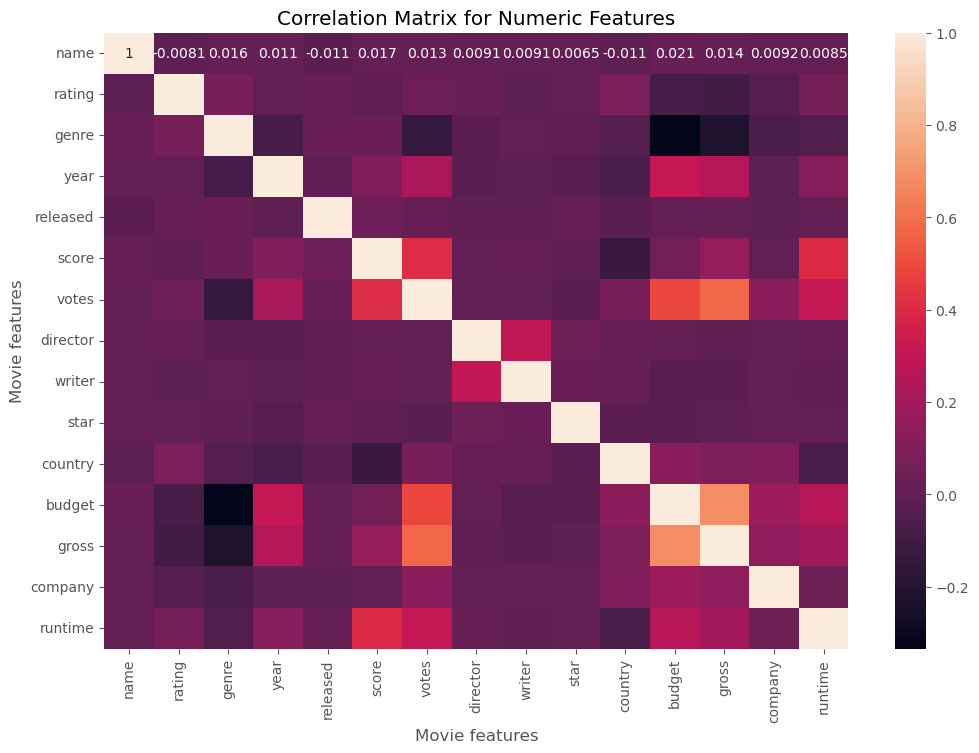

In [97]:
correlation_matrix = df_numerized.corr(method = 'pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)


plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [98]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name             1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating          -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre            0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year             0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released        -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score            0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes            0.013038  0.033743 -0.145296  0.222427  0.015878  0.409182   
director         0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer           0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star             0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country         -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget           0.020548 -0.081939 -0.334021  0.309212  0.009145  0.055665   
gross            0.013895 -0.095355 -0.229534  0.256331  0.014154  0.169406   
company          0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime          0.008483  0.064133 -0.052914  0.116358  0.004852  0.398387   
format_released -0.004951 -0.010258 -0.080051  0.438382  0.026193  0.035082   

                    votes  director    writer      star   country    budget  \
name             0.013038  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating           0.033743  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre           -0.145296 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year             0.222427 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released         0.015878 -0.001478 -0.002404  0.015777 -0.020427  0.009145   
score            0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes            1.000000  0.000349  0.001127 -0.019146  0.073525  0.486931   
director         0.000349  1.000000  0.299067  0.039234  0.017490  0.004976   
writer           0.001127  0.299067  1.000000  0.027245  0.015343 -0.025911   
star            -0.019146  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country          0.073525  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget           0.486931  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross            0.573930 -0.005615 -0.015602 -0.010628  0.091404  0.687124   
company          0.133457  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime          0.306984  0.017062 -0.004036  0.009418 -0.073319  0.268372   
format_released  0.118825  0.003426  0.008115  0.006276  0.016837  0.160726   

                    gross   company   runtime  format_released  
name             0.013895  0.009211  0.008483        -0.004951  
rating          -0.095355 -0.032943  0.064133        -0.010258  
genre           -0.229534 -0.071067 -0.052914        -0.080051  
year             0.256331 -0.010431  0.116358         0.438382  
released         0.014154 -0.010474  0.004852         0.026193  
score            0.169406  0.001030  0.398387         0.035082  
votes            0.573930  0.133457  0.306984         0.118825  
director        -0.005615  0.004404  0.017062         0.003426  
writer          -0.015602  0.005646 -0.004036         0.008115  
star            -0.010628  0.012442  0.009418         0.006276  
country          0.091404  0.095548 -0.073319         0.016837  
budget           0.687124  0.186474  0.268372         0.160726  
gross            1.000000  0.148722  0.203616         0.128314  
company          0.148722  1.000000  0.037537         0.042653  
runtime          0.203616  0.037537  1.000000         0.077207  
format_released  0.128314  0.042653  0.077207         1.000000

In [99]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.008069
                 genre              0.016355
                 year               0.011453
                 released          -0.011311
                 score              0.017097
                 votes              0.013038
                 director           0.009079
                 writer             0.009081
                 star               0.006472
                 country           -0.010737
                 budget             0.020548
                 gross              0.013895
                 company            0.009211
                 runtime            0.008483
                 format_released   -0.004951
rating           name              -0.008069
                 rating             1.000000
                 genre              0.072423
                 year               0.008779
                 released           0.016613
                 score             -0.001314
          

In [100]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget           genre             -0.334021
genre            budget            -0.334021
                 gross             -0.229534
gross            genre             -0.229534
genre            votes             -0.145296
votes            genre             -0.145296
country          score             -0.133348
score            country           -0.133348
rating           gross             -0.095355
gross            rating            -0.095355
rating           budget            -0.081939
budget           rating            -0.081939
year             genre             -0.081261
genre            year              -0.081261
                 format_released   -0.080051
format_released  genre             -0.080051
country          runtime           -0.073319
runtime          country           -0.073319
company          genre             -0.071067
genre            company           -0.071067
year             country           -0.070938
country          year              -0.070938
genre     

In [101]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes            gross              0.573930
gross            votes              0.573930
                 budget             0.687124
budget           gross              0.687124
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
format_released  format_released    1.000000
dtype: float64

In [ ]:
# gross and budget have the highest correlation to gross earnings



